# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

> *Gússem Yahia-Cheikh, Sara Díez and María Colomer*

## 1. Obtaining the dataset and initial steps

In this section we'll look into the original dataset `ObesityDataSet_raw_and_data_sinthetic.csv` for an initial basic inspection. This allows us to:

1. Verify that the data is loaded correctly
2. Understand what kinds of variables are each feature.
3. Detect any possible anomaly and possible issues such as extreme values, incorrect values or missing values.


Esta de aqui abajo obviamente ejecutadla son las librerias :)

In [1]:
#import the needed libraries
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [ ]:
df.shape #we check the total amount of entries

(2111, 17)

In [ ]:
df.info() #general view of the types of entries of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Following the initial exploration of the dataframe, we'll organize the variables by their type since this influences directly the treatment we will apply for the further scrubbing for both the Decision Tree and Random Forest models.

We can observe that we have the following types of features:
- **Numerical features:** `Age`, `Weight` and `Height`. They're continuous magnitudes that already are numerical and won't be needed to be codificated, but it may need normalization or standarization depending the model.
  
- **Binary features** *(we'll consider also those features in which contain yes/no entries, which we'll convert to (0,1) values further in the notebook)* **:** `Gender` (which we will treat male=0 and female=1), `family_history_with_overweight`, `FAVC`,`SMOKE` and `SCC`.
  
- **Ordinal** *(still numerical though)***:** `FCVC`, `NCP`, `FAF`, `TUE`

- **Nominal:** `MTRANS` and `Obesity_level` ; `CALC`and `CAEC` also will be considered as nominal since their entries talk of frequency and intensity and for us it's easier to consider them as this when performing One-Hot Encoding for the Decision Tree model to avoid any confusion or error, but we're awer that they could also be considered as ordinals.

In [ ]:
df.isna() #Checking if there's any null value, but when obtaining the dataset we knew that it didn't had any.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe() #General statistical information

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Now we check for the total values of our target variable to get an idea of how much we're working since further we're going to reduce from 6 classes to 3. We decided to add this reduction procedure since we thought that besides being easier to work with, we only recon to identify a general view of the possible state in which the individual is, we'll talk about this further in the project.

In [ ]:
df['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

## 2. Scrubbing the data

Here we'll clean and transform the categorical variables to a more adequate format for the modelling phase.

First we'll identify automatically all the columns of `object` category with:

In [ ]:
categorical_cols=df.select_dtypes(include='object').columns
list(categorical_cols)

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'Obesity_level']

In [ ]:
for col in categorical_cols:
    print("\n" + "="*60)
    print(f"Column: {col}")
    print(df[col].value_counts())


Column: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Column: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Column: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

Column: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Column: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Column: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64

Column: CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Column: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Column: Obesity_level
Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overwei

Now we'll take the binary features and convert them into (0,1) values for those who have yes/no entries and `gender` that we'll assign `Female`=0 and `Male`=1. This is achieved by mapping and label encode the whole column. 

In [ ]:
binary_map={'yes':1,'no':0}

binary_cols=['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in binary_cols:
    df[col]=df[col].str.lower().map(binary_map)

#Gender Column

df['Gender']=df['Gender'].map({'Female':0,'Male':1})

# We check ou yeah
for col in ['Gender']+binary_cols:
    print(col, ': unique values', df[col].unique())

Gender : unique values [0 1]
family_history_with_overweight : unique values [1 0]
FAVC : unique values [0 1]
SMOKE : unique values [0 1]
SCC : unique values [0 1]


In [ ]:
df['CAEC']=df['CAEC'].str.lower()
df['CALC']=df['CALC'].str.lower()

ordinal_map={'no':0, 'sometimes':1, 'frequently':2, 'always':3}

df['CAEC']=df['CAEC'].map(ordinal_map)
df['CALC']=df['CALC'].map(ordinal_map)

# Checkcheck yahia-cheikh (broma lo pillas?)(maria si lees esto hola y sara si lees esto hola)

print('unique values CAEC', df['CAEC'].unique())
print('unique values CALC', df['CALC'].unique())

unique values CAEC [1 2 3 0]
unique values CALC [0 1 2 3]


In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,normal
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,normal
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Public_Transportation,normal
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Walking,overweight
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,obesity
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,obesity
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,obesity
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,obesity


Now we'll reduce our target variable from 6 to 3 entries, this is achieved once again by label encoding once again. We decided to group it by: normal weight, overweight and obesity; this will make easier to interpret the results and also 'ignoring' the underweight entrie since we're only looking for predictions that dictate if the person given certain factors can suffer from overweight or obesity.

In [ ]:
target_map={
    "Insufficient_Weight": "normal",
    "Normal_Weight": "normal",
    "Overweight_Level_I": "overweight",
    "Overweight_Level_II": "overweight",
    "Obesity_Type_I": "obesity",
    "Obesity_Type_II": "obesity",
    "Obesity_Type_III": "obesity"
}

df['Obesity_level']=df['Obesity_level'].map(target_map)

print(df['Obesity_level'].value_counts())

Obesity_level
obesity       972
overweight    580
normal        559
Name: count, dtype: int64


In [ ]:
df.to_csv('obesity_scrubbed.csv', index=False)

In [ ]:
df_scrub=pd.read_csv('obesity_scrubbed.csv')

### 2.1. Random Forest Dataset

In [ ]:
df_RF=df_scrub.copy()

In [ ]:
df_RF['MTRANS']=df_RF['MTRANS'].astype('category')

In [ ]:
mtrans_mapping=dict(enumerate(df_RF['MTRANS'].cat.categories))
print(mtrans_mapping)

{0: 'Automobile', 1: 'Bike', 2: 'Motorbike', 3: 'Public_Transportation', 4: 'Walking'}


In [ ]:
df_RF['MTRANS']=df_RF['MTRANS'].cat.codes

In [ ]:
print(sorted(df_RF['MTRANS'].unique()))

[np.int8(0), np.int8(1), np.int8(2), np.int8(3), np.int8(4)]


In [ ]:
df_RF

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3,normal
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3,normal
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3,normal
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,4,overweight
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3,obesity
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3,obesity
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3,obesity
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3,obesity


In [ ]:
df_RF.to_csv('obesity_random_forest.csv', index=False)

### 2.3. Decision Tree Dataset

In [ ]:
df_DT=df_scrub.copy()

In [ ]:
df_DT=pd.get_dummies(df_DT, columns=['MTRANS'], drop_first=True)

In [ ]:
mtrans_ohe=[c for c in df_DT.columns if c.startswith('MTRANS_')]

In [ ]:
print(mtrans_ohe, '\n', df_DT.shape)

['MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'] 
 (2111, 20)


In [ ]:
df_DT

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Obesity_level,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,normal,False,False,True,False
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,normal,False,False,True,False
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,normal,False,False,True,False
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,overweight,False,False,False,True
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,overweight,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,obesity,False,False,True,False
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,obesity,False,False,True,False
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,obesity,False,False,True,False
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,obesity,False,False,True,False


In [ ]:
df_DT.to_csv('obesity_decision_tree.csv', index=False)

# **A PARTIR DE AQUI YA PODEIS EJECTUAR :)**

In [5]:
df_DT=pd.read_csv('obesity_decision_tree.csv')

In [6]:
df_RF=pd.read_csv('obesity_random_forest.csv')

# 3. Exploratory Data Analysis (EDA)

To do list: data quality (OUTLIER IDENTIFICATION + plot, NORMALIZATION MIN-MAX?), target disctribution plot, boxplot of numerical VS target and correlation.

### Target Distribution Plot

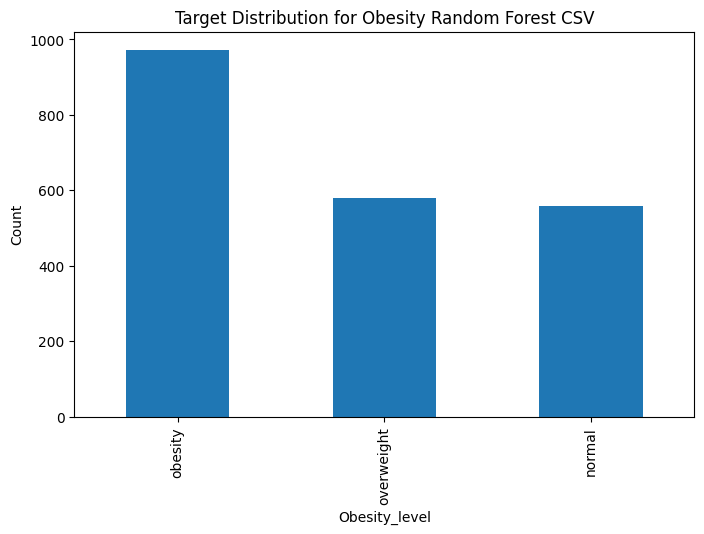

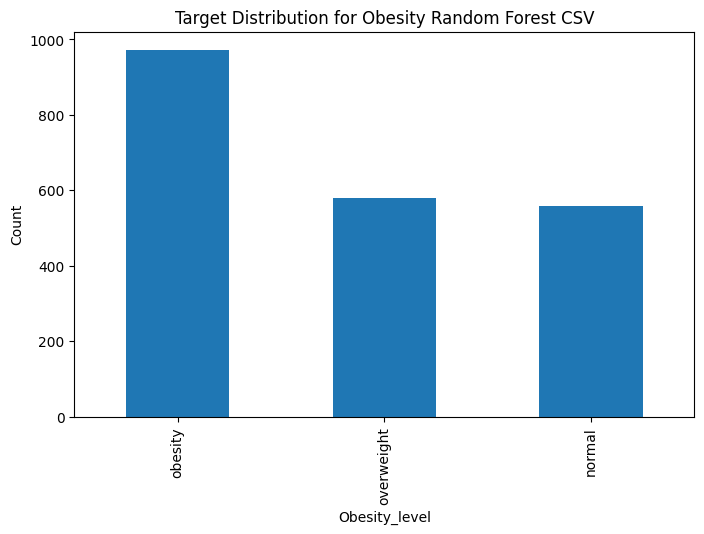

In [7]:
import matplotlib.pyplot as plt

csv_files = ["obesity_random_forest.csv","obesity_decision_tree.csv"]
target_column = "Obesity_level"

for file in csv_files:
    counts = df_DT[target_column].value_counts()
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar')
    if csv_files[0]:
        plt.title(f"Target Distribution for Obesity Random Forest CSV")
    else:
        plt.title(f"Target Distribution for Obesity Decision Tree CSV")
    plt.xlabel(target_column)
    plt.ylabel("Count")
    plt.show()

### Boxplot

In this section we will develop the box plot for each of our CSV's, in the first subsection it would be grouped by the target class (obesity_level) and in the second subsection for all numeric features in the CSV's.

#### Boxplot by the Target Class

/var/folders/_1/mzpv4xr96cx472xf0zm5699r0000gn/T/ipykernel_1855/385592036.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

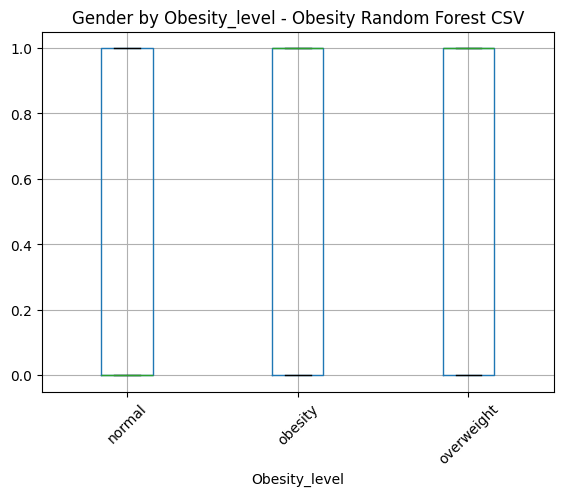

<Figure size 800x500 with 0 Axes>

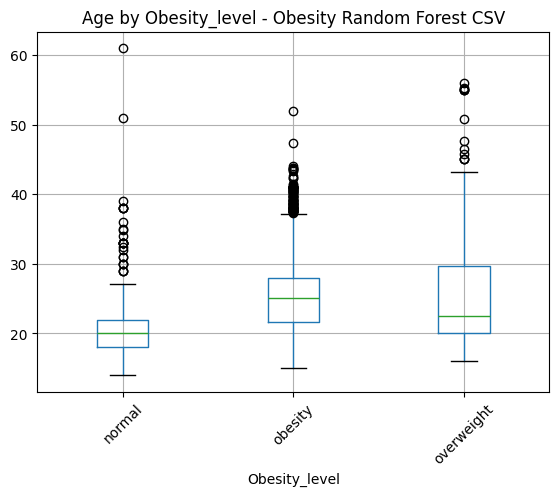

<Figure size 800x500 with 0 Axes>

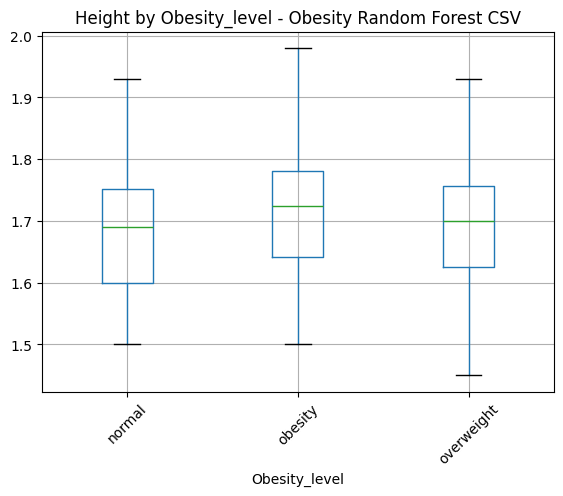

<Figure size 800x500 with 0 Axes>

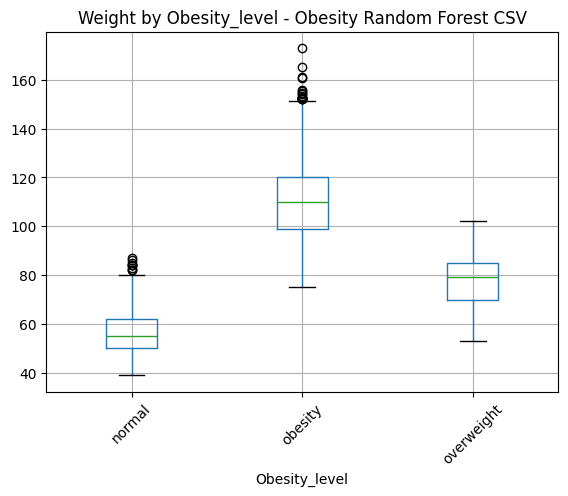

<Figure size 800x500 with 0 Axes>

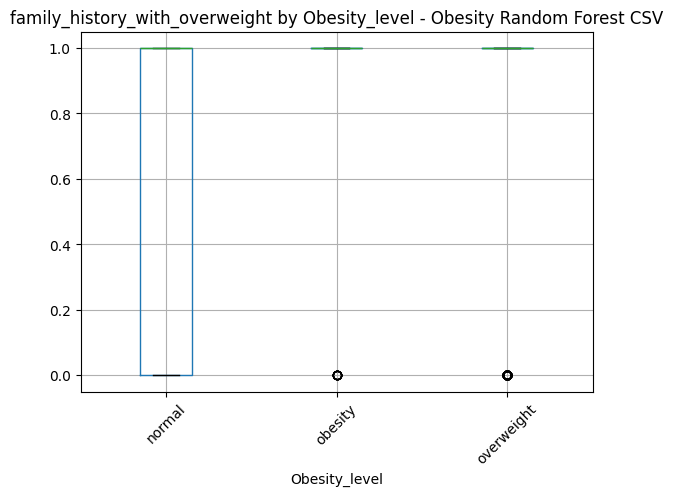

<Figure size 800x500 with 0 Axes>

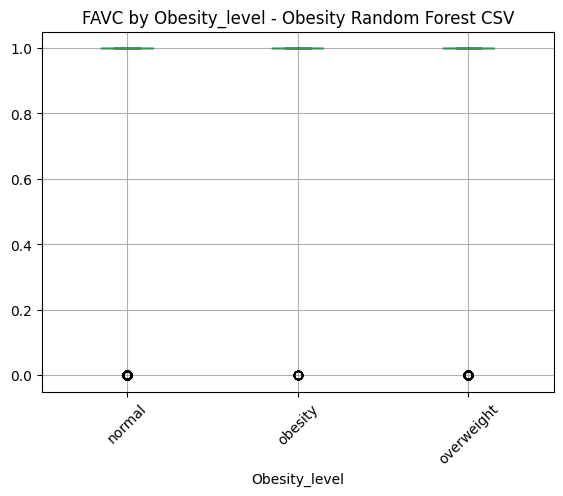

<Figure size 800x500 with 0 Axes>

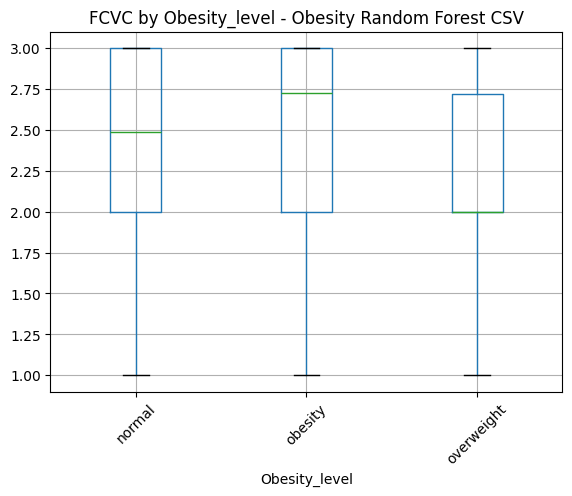

<Figure size 800x500 with 0 Axes>

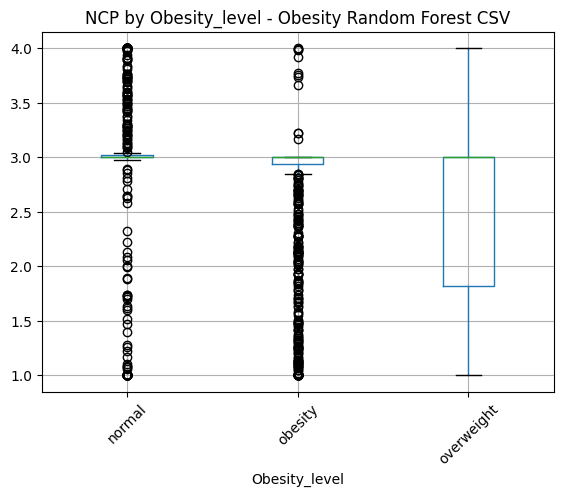

<Figure size 800x500 with 0 Axes>

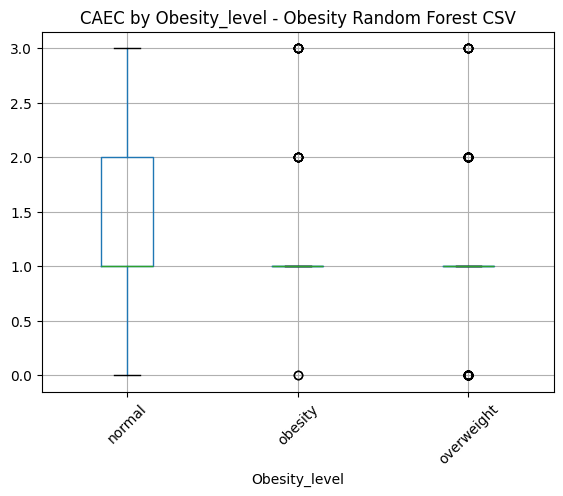

<Figure size 800x500 with 0 Axes>

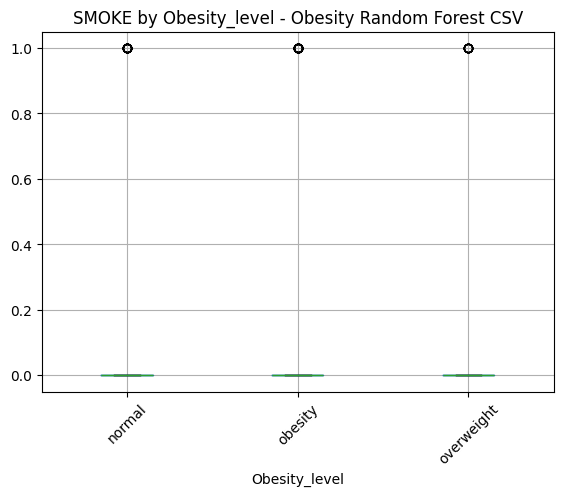

<Figure size 800x500 with 0 Axes>

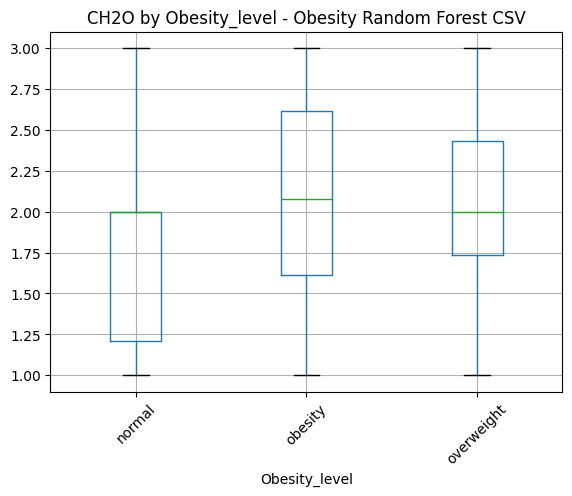

<Figure size 800x500 with 0 Axes>

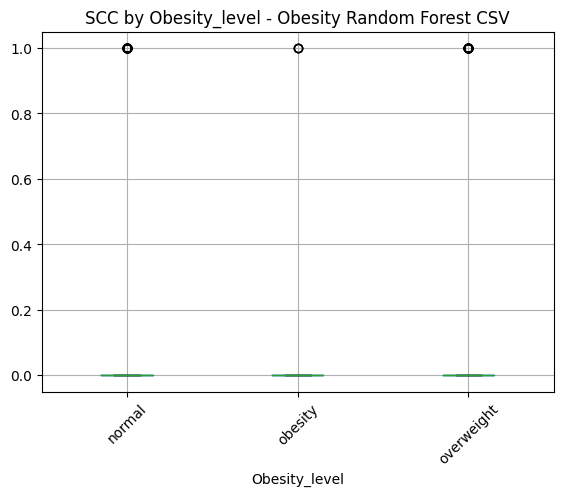

<Figure size 800x500 with 0 Axes>

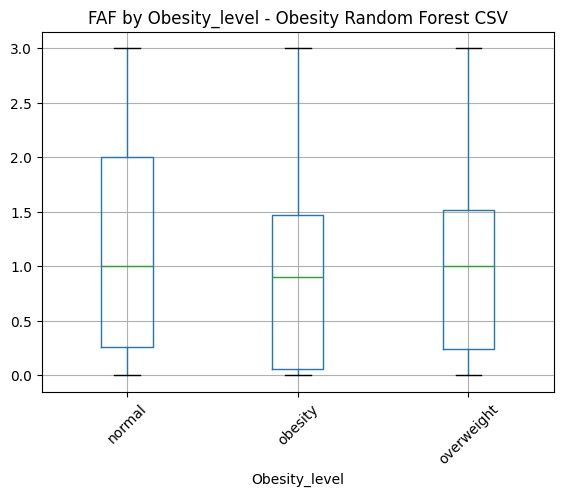

<Figure size 800x500 with 0 Axes>

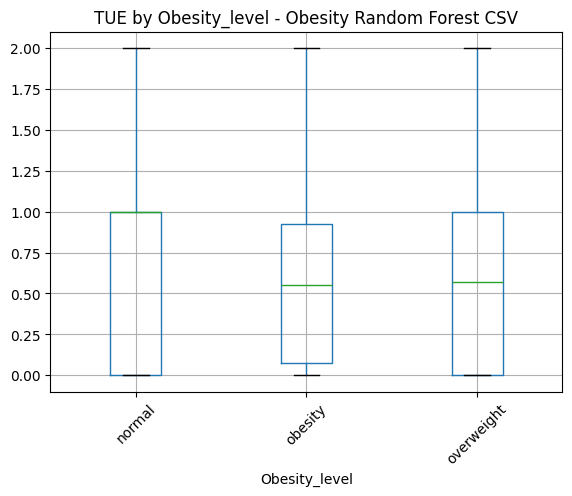

<Figure size 800x500 with 0 Axes>

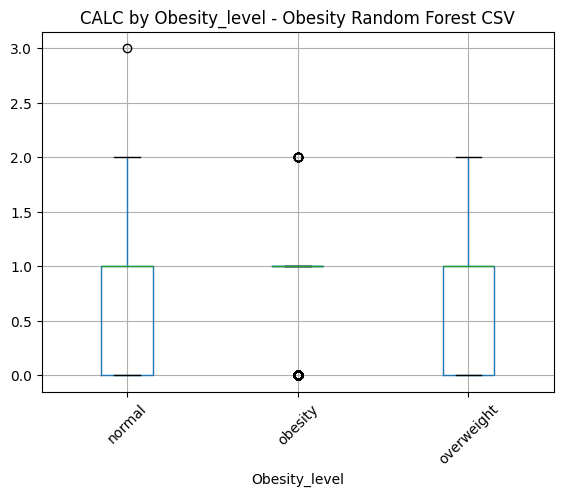

<Figure size 800x500 with 0 Axes>

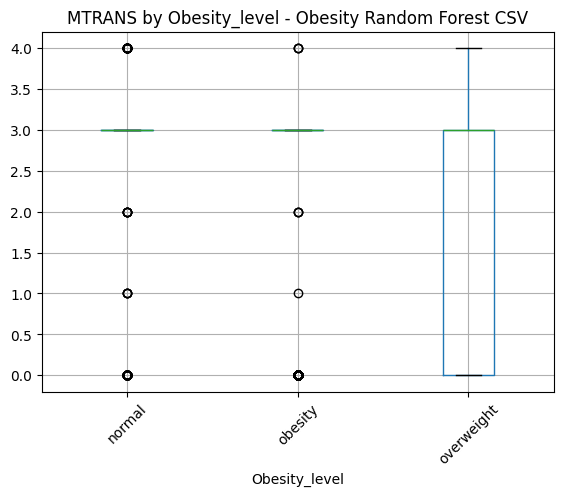

<Figure size 800x500 with 0 Axes>

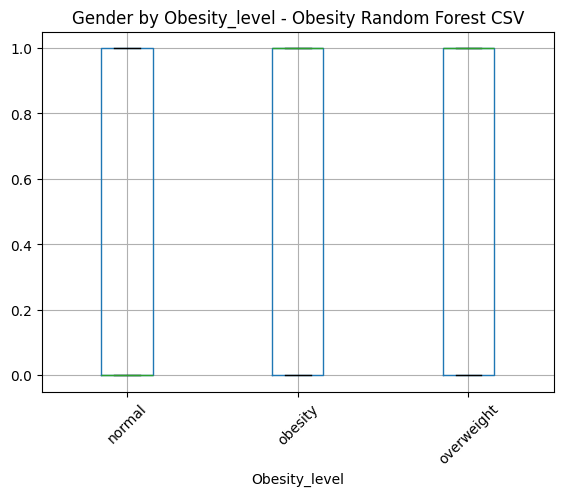

<Figure size 800x500 with 0 Axes>

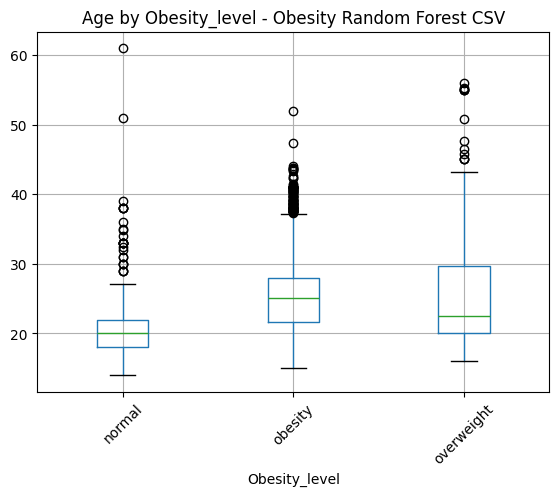

<Figure size 800x500 with 0 Axes>

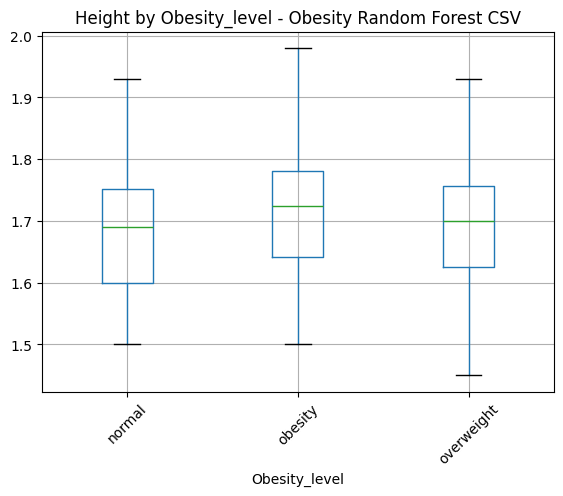

<Figure size 800x500 with 0 Axes>

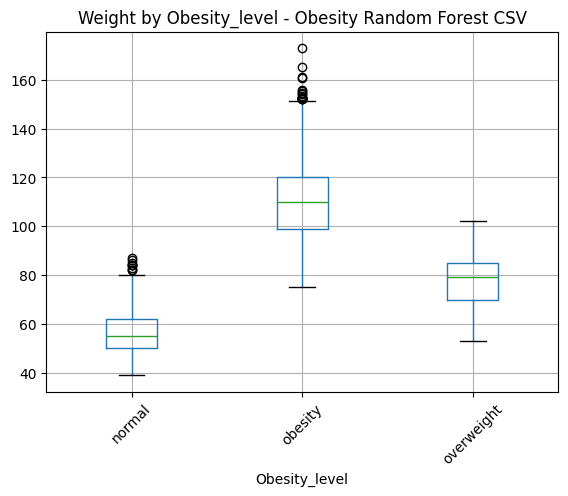

<Figure size 800x500 with 0 Axes>

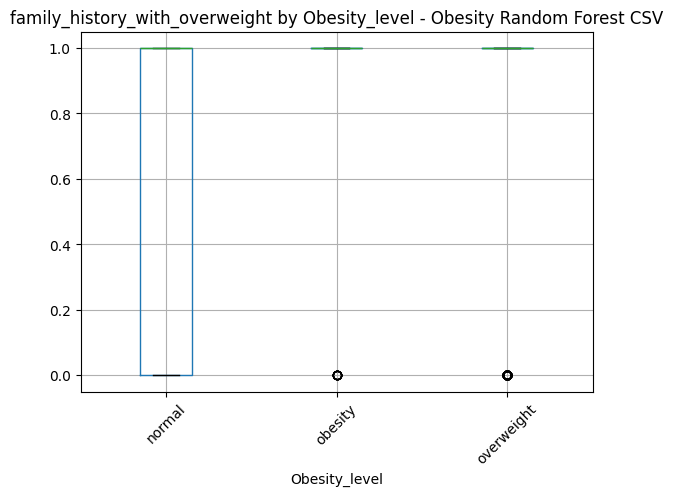

<Figure size 800x500 with 0 Axes>

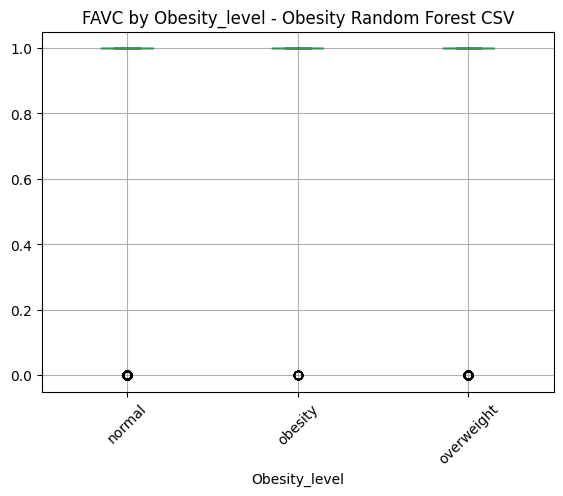

<Figure size 800x500 with 0 Axes>

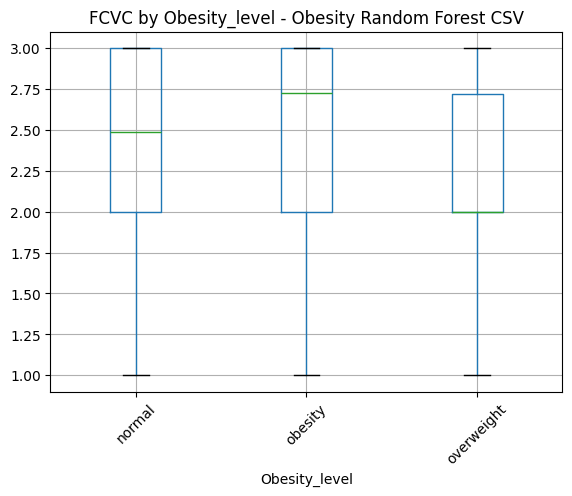

<Figure size 800x500 with 0 Axes>

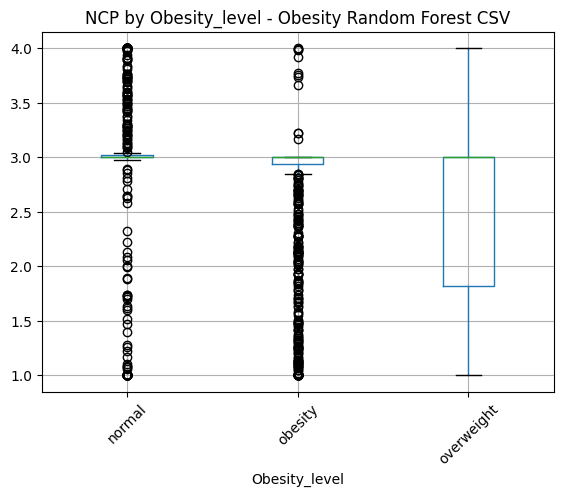

<Figure size 800x500 with 0 Axes>

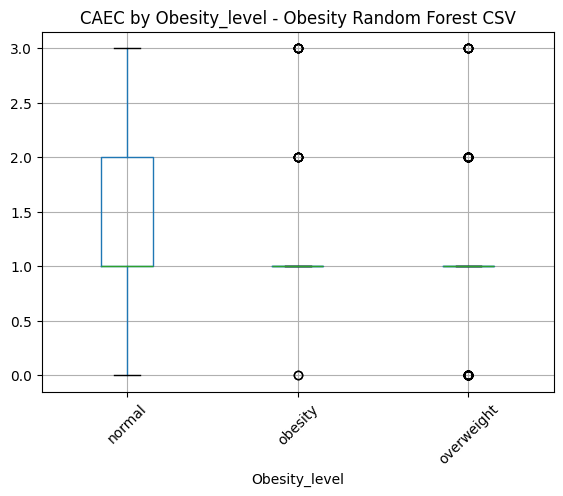

<Figure size 800x500 with 0 Axes>

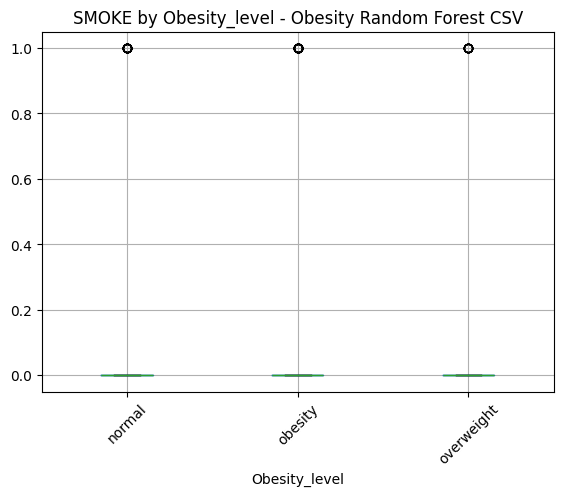

<Figure size 800x500 with 0 Axes>

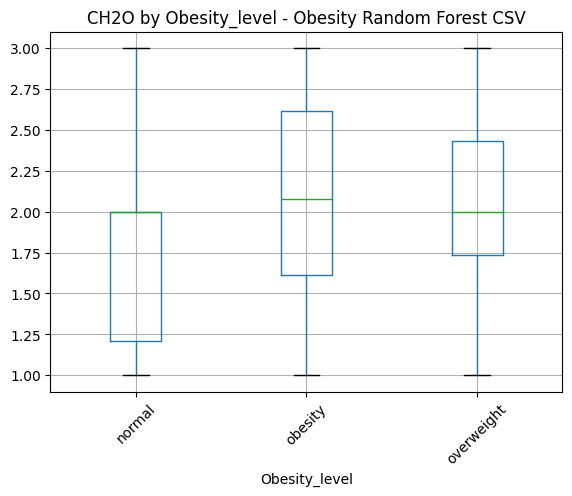

<Figure size 800x500 with 0 Axes>

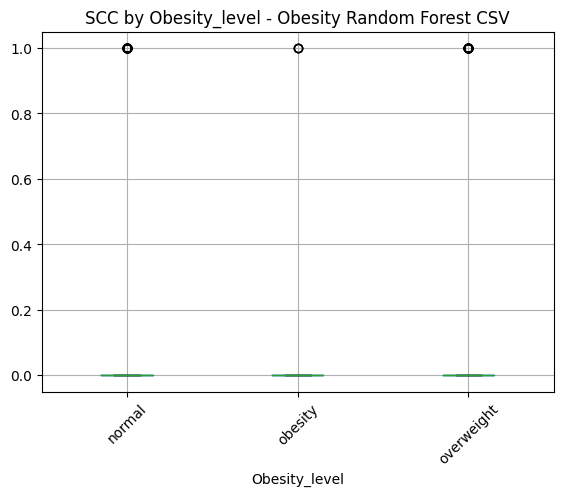

<Figure size 800x500 with 0 Axes>

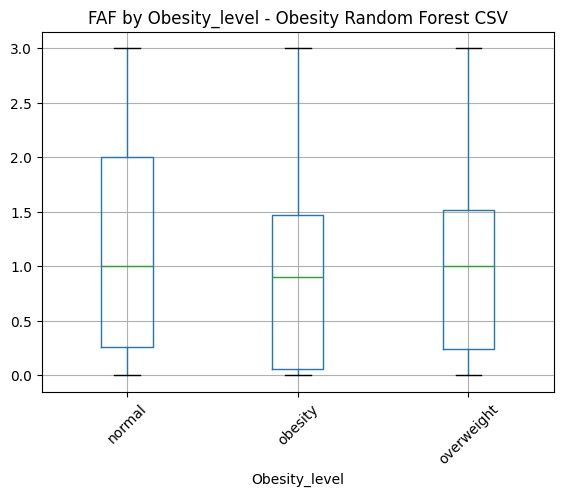

<Figure size 800x500 with 0 Axes>

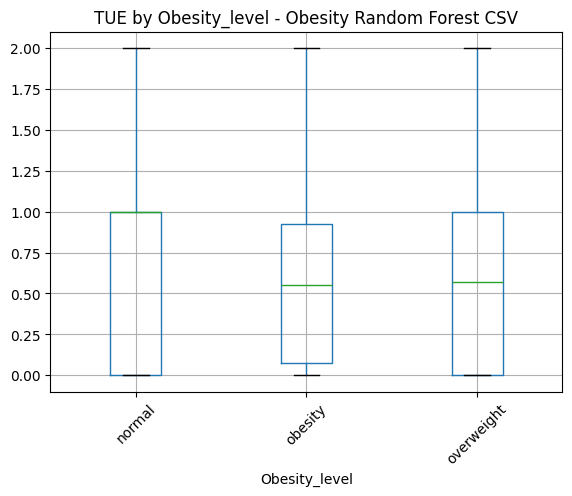

<Figure size 800x500 with 0 Axes>

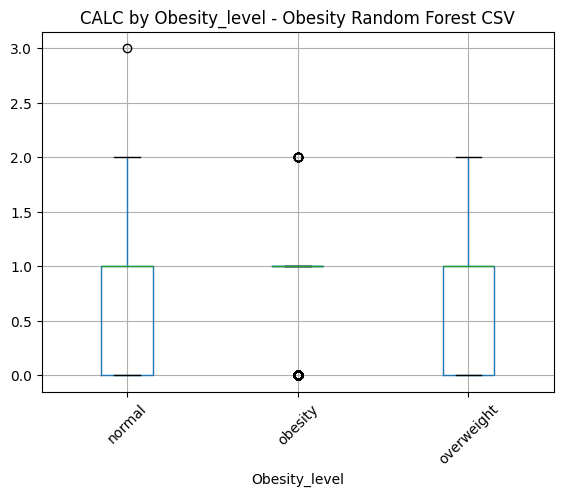

In [8]:
csv_files = ["obesity_random_forest.csv","obesity_decision_tree.csv"]
target_column = "Obesity_level"

for file in csv_files:
    df = pd.read_csv(file)
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        df.boxplot(column=col, by=target_column)
        if csv_files[0]:
            plt.title(f"{col} by {target_column} - Obesity Random Forest CSV")
        else:
            plt.title(f"{col} by {target_column} - Obesity Decision Tree CSV")
        plt.suptitle("")
        plt.xticks(rotation=45)

#### Boxplot for all numeric features

In [ ]:
for file in csv_files:
    numeric_cols = df.select_dtypes(include='number')
    plt.figure(figsize=(12, 6))
    numeric_cols.boxplot()
    if csv_files[0]:
        plt.title(f"Boxplot of Numeric Features - Obesity Random Forest CSV")
    else:
        plt.title(f"Boxplot of Numeric Features - Obesity Decision Tree CSV")
    plt.xticks(rotation=45)
    plt.show()

### Correlation

In [9]:
csv_files = ["obesity_random_forest.csv","obesity_decision_tree.csv"]
for file in csv_files:
    corr = df.select_dtypes(include='number').corr()
    if csv_files[0]:
        print(f"\nCorrelation Matrix for Obesity Random Forest:\n")
        print(corr)
    else:
        print(f"\nCorrelation Matrix for Obesity Decision Tree:\n")
        print(corr)


Correlation Matrix for Obesity Random Forest:

                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.048394  0.618466  0.161668   
Age                             0.048394  1.000000 -0.025958  0.202560   
Height                          0.618466 -0.025958  1.000000  0.463136   
Weight                          0.161668  0.202560  0.463136  1.000000   
family_history_with_overweight  0.102512  0.205725  0.247684  0.496820   
FAVC                            0.064934  0.063902  0.178364  0.272300   
FCVC                           -0.274505  0.016291 -0.038121  0.216125   
NCP                             0.067600 -0.043944  0.243672  0.107469   
CAEC                           -0.091543 -0.083739 -0.048818 -0.287493   
SMOKE                           0.044698  0.091987  0.055499  0.025746   
CH2O                            0.107930 -0.045304  0.213376  0.200575   
SCC                            -0.102633 -0.116283 -0.133753 -0.

# Decision Tree

To evaluate the model fairly, the dataset is divided into:
- **Training set (75%)**
- **Test set (25%)**

We use `train_test_split` with a fixed `random_state` with seed `RANDOM_SEED=0` to ensure reproducibility.

Separating data prevents overfitting and ensures that performance metrics reflect how well the model generalizes to unseen data.


We first train a simple Decision Tree, with `max_depth=1`, as a baseline model.  

This baseline allows us to compare:
- How well a simple model performs
- How much improvement we gain from hyperparameter tuning
- How Random Forests outperform a single tree

Although Decision Trees are easy to interpret, they tend to overfit when grown deep, so this model serves mainly as a reference point.



0.6098484848484849

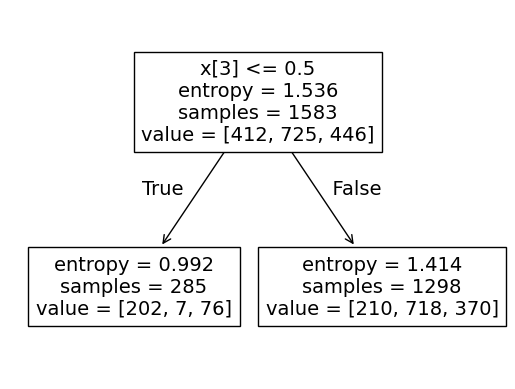

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

RANDOM_SEED = 0
X_DT = df_DT.drop(["Obesity_level", "Weight"], axis=1)
y_DT = df_DT["Obesity_level"]

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y_DT, test_size=0.25, random_state=RANDOM_SEED)

tree_1 = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=RANDOM_SEED)
tree_1.fit(X_train_DT, y_train_DT)

_ = tree.plot_tree(tree_1)

accuracy_score(y_test_DT, tree_1.predict(X_test_DT))

Decision Trees often overfit, so tuning their hyperparameters is essential.  
We use `GridSearchCV` to automatically test different combinations of:

- **max_leaf_nodes**: controls model complexity by limiting tree size  
- **min_samples_split**: minimum samples required to split a node  
- **max_depth** (optional): maximum depth of the tree  

`GridSearchCV` uses 5-fold cross validation (cv=5):
- The training data is split into 5 parts
- The model is trained on 4 parts and validated on the remaining part
- This repeats 5 times
- The average performance is used to choose the best setting

This prevents biased results and selects the most generalizable model.


In [11]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 300)), 'min_samples_split': list(range(2, 20))}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), params, verbose=1, cv=5)
grid_dt.fit(X_train_DT, y_train_DT)

Fitting 5 folds for each of 5364 candidates, totalling 26820 fits


,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [12]:
def tree_info(tree_):
    """Print brief insights of the tree."""
    print("depth:", tree_.get_depth(), ", n_leaves:", tree_.get_n_leaves())

print(grid_dt.best_params_)
best_tree_dt = grid_dt.best_estimator_
tree_info(best_tree_dt)

{'max_leaf_nodes': 144, 'min_samples_split': 2}
depth: 15 , n_leaves: 144


In [13]:
y_pred_DT = best_tree_dt.predict(X_test_DT)
accuracy_score(y_test_DT, y_pred_DT)

0.8465909090909091

In [14]:
#tree.plot_tree(best_tree_dt, fontsize=6, filled=True)

importances = best_tree_dt.feature_importances_
feature_names = X_train_DT.columns

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_imp)

                           Feature  Importance
3   family_history_with_overweight    0.149314
1                              Age    0.147938
7                             CAEC    0.117355
2                           Height    0.113720
6                              NCP    0.109964
5                             FCVC    0.062203
9                             CH2O    0.057643
11                             FAF    0.053979
12                             TUE    0.050344
16    MTRANS_Public_Transportation    0.049687
13                            CALC    0.032663
4                             FAVC    0.021121
0                           Gender    0.017372
10                             SCC    0.009077
17                  MTRANS_Walking    0.005754
8                            SMOKE    0.001865
14                     MTRANS_Bike    0.000000
15                MTRANS_Motorbike    0.000000


# Random Forest

We use this methodas it greatly reduces overfitting because:

- Each tree sees slightly different data
- Each tree considers only a subset of features when splitting
- The final prediction is based on averaging

Compared to a single tree, Random Forests:
- Generalize better
- Are more robust to noise
- Provide reliable feature importance scores

We train a Random Forest with 200 trees (`n_estimators=200`) for strong predictive performance.


In [15]:
from sklearn.ensemble import RandomForestClassifier

X_RF = df_RF.drop(["Obesity_level", "Weight"], axis=1)
y_RF = df_RF["Obesity_level"]

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, test_size=0.25, random_state=RANDOM_SEED)

clf_rndbag = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    n_jobs=-1,
    random_state=RANDOM_SEED)

clf_rndbag.fit(X_train_RF, y_train_RF)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
accuracy_score(y_test_RF, clf_rndbag.predict(X_test_RF))

0.9071969696969697

Next, we measure feature importance, as it reflects:
- How often a feature is chosen for splits across all trees
- How much it reduces impurity when used

This information is crucial because it tells us:
- Which factors most strongly affect obesity level
- Which features could be simplified or removed
- How to interpret the model in context of health and behavior


In [17]:
importances = clf_rndbag.feature_importances_

feature_names = X_train_RF.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,Age,0.154057
2,Height,0.114841
6,NCP,0.091331
11,FAF,0.087779
7,CAEC,0.087040
3,family_history_with_overweight,0.082187
5,FCVC,0.079386
9,CH2O,0.078341
12,TUE,0.077441
13,CALC,0.037830


Accuracy alone does not reveal which classes the model struggles with. Because of this, we compute:
- **Confusion Matrix**: shows how often each obesity category is correctly or incorrectly predicted
- **Classification Report**: includes precision, recall, and F1-score for each class

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_RF = clf_rndbag.predict(X_test_RF)

print(confusion_matrix(y_test_RF, y_pred_RF))
print(classification_report(y_test_RF, y_pred_RF))

[[134   8   5]
 [  5 239   3]
 [ 17  11 106]]
              precision    recall  f1-score   support

      normal       0.86      0.91      0.88       147
     obesity       0.93      0.97      0.95       247
  overweight       0.93      0.79      0.85       134

    accuracy                           0.91       528
   macro avg       0.91      0.89      0.90       528
weighted avg       0.91      0.91      0.91       528



These metrics let us evaluate:
- Which obesity levels are hardest to classify
- Whether the model favors certain categories
- Whether the model achieves balanced performance

This step provides a deeper and more honest assessment of the model’s effectiveness.
